## LANGKAH - LANGKAH PENYELESAIAN

1. Question atau Pendefinisan Masalah
2. Mendapatkan trainning dan testing data
3. Data Wrangling, Data Preprocessing, Data Cleansing
4. Data Analysis, Identifikasi Pola, dan Ekplorasi data
5. Membuat model, memprediksi dan menyelesaikan masalah
6. Data Visualization, laporan (report), menyajikan langkah-langkah penyelesaian masalah dan solusi akhir
7. Submit hasil

## LIBRARY-LIBRARY YANG DIBUTUHKAN

In [2]:
# Untuk Data Analysis dan Data Wrangling
import pandas as pd
import numpy as np
import random as rnd

# Untuk Visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# Untuk membuat model machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## MEMPERSIAPKAN DATA

In [3]:
# Mengambil data dari csv ke dataframe
train_df = pd.read_csv('D:\Data-science-competition/train.csv')
test_df = pd.read_csv('D:\Data-science-competition/test.csv')
combine = [train_df, test_df]

## ANALISIS DATA

In [4]:
# Kolom-kolom yang ada pada dataset
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### MENGIDENTIFIKASI FEATURE MANA YANG DATANYA CATEGORICAL DAN YANG MANA NUMERICAL

Tujuan : Agar kita dapat menentukan plot yang sesuai untuk feature-feature tersebut

Categorical Features : 
 - Survived 
 - Sex
 - Embarked
 - Ordinal : Pclass

&nbsp;

Numerical Features :
 - Continous : Age, Fare
 - Discrete  : SibSp, Parch 
 

****

## Catatan

Data Ordinal yang dimaksudkan adalah data kategori dalam bentuk angka namun berurut (punya kasta)

Jenis - jenis data dalam Categorical Data
- Nominal
- Ordinal
- Ratio
- Interval

Jenis - jenis data dalam Numerical Data
- Discrete
- Continous
- Timeseries

***

In [5]:
# Review Data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


** Features mana yang punya tipe data campuran? **

Data Numerik dan Alfanumerik terdapat pada :
- Ticket : Campuran data numerik dan alfanumerik
- Cabin  : Alpanumerik 

&nbsp;

** Features mana yang memiliki data yang blank, null, atau kosong? **
 - Cabin > Age > Embarked memiliki beberapa nilai null pada training dataset
 - Cabin > Age tidak lengkap pada test dataset


***
 ## Catatan
Alfanumerik adalah tipe data yang terdiri dari campuran angka, huruf bahkan lambang matematika
****

### APA SAJA TIPE DATA DARI FEATURES YANG KITA PUNYA
 - 7 Features integer / floats. 6 pada test dataset
 - 5 Features adalah strings (objek)

In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

### APA DISTRIBUSI DARI NILAI-NILAI NUMERICAL FEATURES DISELURUH SAMPLE?

Tujuan : untuk mengetahui seberapa representatif (sesuai) antara dataset dan permasalahan realnya

- Total sample adalah 891 atau 40% dari data aslinya (data penumpang asli kapal titanic adalah 2224)
- Survived adalah categorical features dengan nilai 0 atau 1
- Sekitar 38% sample yang bertahan hidup representasi dari sebenarnya yaitu 32%
- Sebagian besar penumpang ( > 75%) tidak berpergian dengan orang tua atau anak
- Hampir 30% penumpang memiliki pasangan atau saudara kandung di kapal
- Tarif bervariasi secara signifikan dengan beberapa penumpang (< 1%) membayar dengan harga yang tinggi ($ 512)
- Ada beberapa penumpang lansia (< 1%) dalam rentang usia 65-80


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### DISTRIBUSI DARI CATEGORICAL FEATURES
 - Names memiliki nilai yang unique (Tidak ada nama yang sama)
 - Variabel sex kemungkinan memiliki 65% male
 - Data-data pada varibael kabin memiliki duplikat di seluruh sampel. secara alternatif, beberapa enumpang kapal berbagi kabin
 - Ada tiga kemungkinan nilai pada embarked. Pelabuhan S (Southampton) paling banyak digunakan oleh penumpang untuk naik ke kapal..
- Ticket feature memiliki ratio (22%) nilai duplikat

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wilhelms, Mr. Charles",male,347082,G6,S
freq,1,577,7,4,644


## ASUMSI BERDASARKAN ANALISIS DATA
Berikut adalah hal yang akan dilakukan selanjutnya


### CORRELATING

Untuk mengetahui seberapa bagus korelasi antara features yang ada dengan variabel Survival

### COMPLETING
 - Melengkapi feature age yang punya korelasi dengan Survive
 - Melengkapi Embarked dan juga features lainnya

### CORRECTING

 1. Feature Ticket akan dihapuskan dari analisis karena feature ini punya rasio duplikat yang tinggi (22%), juga kemungkinan tidak ada korelasi antara tiket dan bertahan hidup

2. Feature Cabin mungkin juga akan dihapus karena punya nilai null yang banyak, baik pada training dataset maupun test dataset

3. passengerId juga akan dihapus dari training dataset karena kemungkinan tidak ada hubungannya pada Survival

4. Feature name juga tidak berhubungan dengan Survival


### CREATING

1. Membuat feature baru bernama Family, datanya diisi berdasarkan Parch dan SibSp untuk mendapatkan total anggota keluar yang ikut berlayar

2. Membuat feature untuk kelompok usia. Mengubah numerical value berkelanjutan menjadi categorical feature ordinal

3. Membuat feature rentang tarif untuk membantu analisa data 


### CLASSIFYING

1. Wanita (Sex=female) lebih berkemungkinan bertahan hidup
2. Anak-anak lebih berkemungkinan bertahan hidup
3. Penumpang kelas atas (Pclass=1) lebih berkemungkinan untuk bertahan hidup


## ANALISIS DATA DENGAN PIVOTING FEATURES
dengan pivoting ini kita dapat dengan lebih cepat mengetahui korelasi antar feature, tentunya untuk mengetahui korelasi ini nilai-nilai feature tidak boleh ada yang kosong, dan pivoting ini hanya bisa dilakukan pada features numerical dengan jenis
- Categorical (Sex)
- Ordinal (Pclass)
- Discrete (SibSp, Parch)

&nbsp;

- ** Pclass ** :  
Pclass punya korelasi yang cukup kuat dengan survived Pclass 1 (> 0.5) (Classifying #3), sehingga akan digunakan pada model

- ** Sex ** :
Sex = female punya tingkat bertahan hidup yang tinggi yaitu 74% (Classifying #1)

- ** SibSp dan Parch ** : Kedua feature ini tidak punya korelasi untuk nilai tertentu. Mungkin lebih bagus untuk membuat feature baru berdasarkan kedua feature ini (Creating #1)


In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df['Age'].corr(train_df['Survived'])

-0.07722109457217768

In [12]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## ANALISIS DATA DENGAN VISUALISASI DATA
Analisis dengan visualisasi data bertujuan untuk menguatkan asumsi atau pernyataan-pernyataan yang sudah disimpulkan..

## CORRELATING NUMERICAL FEATURES
Mari mulai dengan memahami korelasi antar numerical features dengan solution goal (Survived)

Sebuah chart histogram biasanya berguna untuk menganalisa continous numerical variables seperti Age, dimana rentang akan membantu untuk mengenali pola.

### OBSERVATIONS
 - Infants (Age <= 4) punya tingkat bertahan hidup yang tinggi
 - Penumpang lansia (Age = 80) selamat
 - Kebanyakan penumpang berumur 15-35 tahun

### DECISIONS
Analisis sederhana yang menguatkan asumsi kita sebagai keputusan untuk alur kerja tahap selanjutnya
- Mempertimbangkan umur (Asumsi classifying #2) pada model training
- Melengkapi Feature Age untuk null values (Completing #1)
- Membatasi kelompok usia

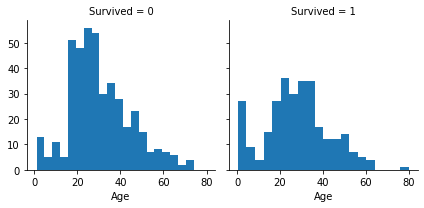

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

## CORRELATING NUMERICAL DAN ORDINAL FEATURES

Kita dapat menggabungkan beberapa features untuk mengidentifikasi korelasi menggunakan satu plot. hal ini bisa dilakukan dengan numerical dan categorical features yang punya numerical values.

### OBSERVATIONS
- Pclass=3 punya penumpang terbanyak, bagaimanapun kebanyakan tidak selamat. Menguatkan classifying pada assumption #2
- Penumpang bayi pada Pclass=2 dan Pclass=3 sebagian besar selamat.
- Pclass bervariasi dalam hal distribusi usia penumpang

### DECISIONS
Mempertimbangkan Pclass untuk model training

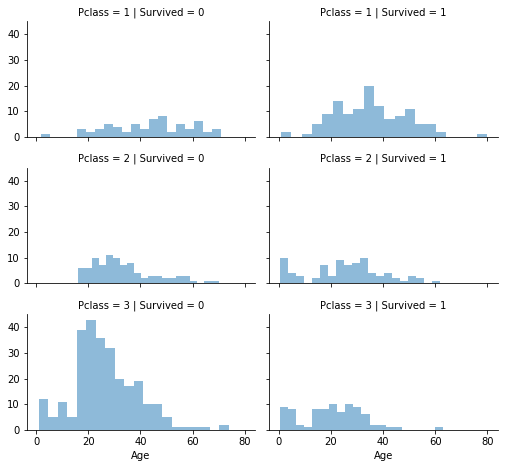

In [15]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

## CORRELATING CATEGORICAL FEATURES

### OBSERVATIONS
- Penumpang wanita punya tingkat bertahan hidup yang lebih baik daripada laki-laki. Menguatkan classifying (#1)
- Pengecualian di Embarked=C dimana laki-laki punya tingkat bertahan hidup yang lebih tinggi. Pasti mungkin ada korelasi antara Pclass dan Embarked dan selanjutnya Pclass dan Survived, namun antara embarked dan survived mungkin belum tentu berkorelasi langsung
- Laki-laki punya tingkat bertahan hidup yang lebih baik pada Pclass=3 saat dibandingkan dengan Pclass=2 untuk pelabuhan C dan Q. Completing (#2)
- Pelabuhan Pelayaran memiliki tingkat bertahan hidup yang bervariasi untuk Pclass=3 dan antara penumpang pria. Correlating (#1)

### DECISIONS
- Menambahkan Sex Feature pada model training
- Melengkapi dan menambahkan Embarked Feature pada model training

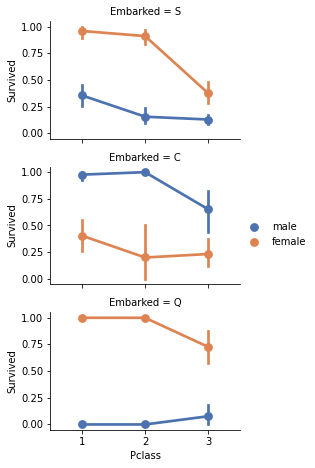

In [16]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

## CORRELATING CATEGORICAL DAN NUMERICAL FEATURES
kita mungkin juga ingin mengkorelasikan categorical features (dengan nilai non-numerik) dengan Numeric Features. kita bisa correlating Embarked (Categorical non-numerik), Sex (Categorical non-Numerik), Fare (Numerik Berkelanjutan), dengan Survived (Categorical Numerik).

### OBSERVATIONS
- Penumpang yang membayar lebih tinggi punya tingkat bertahan hidup yang lebih baik. Menguatkan asumsi kita pada Creating #4 rentang fare

### DECISIONS
- Mempertimbangkan membatasi Feature Fare

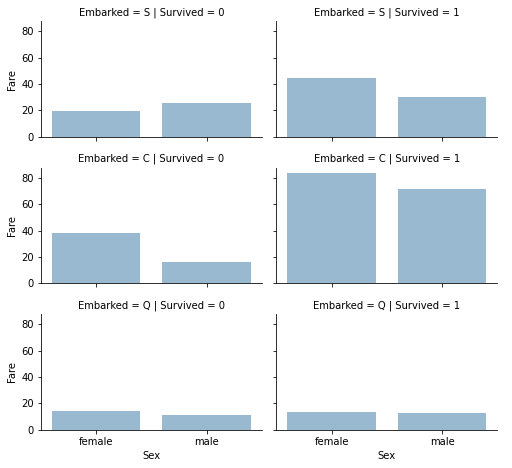

In [17]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## DATA WRANGLING
Kita sudah mengumpulkan beberapa asumsi dan keputusan terkait dataset dan keperluan untuk solusi. Sejauh ini kita tidak perlu merubah suatu feature atau nilai pada bagian wrangling data. Mari kita mengimplementasikan keputusan dan asumsi untuk Correcting, Creating, dan Completing goals

## CORRECTING DENGAN DROPPING FEATURES
Berdasarkan asumsi dan keputusan kita akan melakukan drop pada features Cabin (Correcting #2) dan Ticket (Correcting #1)

##


In [18]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

## MEMBUAT FEATURE BARU BERDASARKAN FEATURES YANG ADA
Kita akan menganalisis apakah feature Name dapat direkayasa untuk mengekstrak Gelar. Tujuan dari ekstraksi ini adalah untuk mengetahui apakaha ada hubungan antar gelar dengan bertahan hidup. Sebelum melakukan drop pada Name dan PassengerId.

Untuk mengekstrak Gelar, kita akan menggunakan ekspresi regular yaitu The RegEx pattern


In [19]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Kita dapat mengganti gelar dengan nama yang lebih umum atau mengklasifikasikannya sebagai Rare

In [20]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Kita dapat mengkonvert categorical title menjadi ordinal

In [21]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


***
## CATATAN
Dari kasus diatas dapat disimpulkan, sebelum menghapus suatu features, sebaiknya menganalisanya terlebih dahulu, karena mungkin ada bagian pada features tersebut memiliki korelasi dengan variabel target / goal untuk mendukung tingkat akurasi dalam prediksi..
***

Setelah proses diatas, sekarang kita bisa dengan aman melakukan drop pada Feature Name dari training dan testing dataset. Kita juga tidak memerlukan passengerId pada training dataset.

In [22]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

## CONVERTING SEBUAH CATEGORICAL FEATURE
Kita dapat mengkonversi features yang berisi String menjadi numerik. Hal ini dibutuhkan oleh kebanyakan Algoritma untuk membuat model.

Mari kita mulai dengan mengkonversi Feature Sex menjadi feature baru bernama Gender dimana female=1 dan male=0

In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## MENYEMPURNAKAN FEATURE NUMERIK BERKELANJUTAN
Sekarang saatnya mulai memperkirakan dan melengkapi features dengan missing values atau null values. Kita akan mulai dengan Feature Age

Kita bisa mempertimbangkan untuk menggunakan satu diantara tiga metode berikut

1. Cara yang simple yaitu dengan mengisi null atau missing values dengan nilai acak di antara mean dan standar deviasi

2. Cara yang lebih akurat ialah dengan menggunakan features lain yang berkolerasi. Dalam kasus ini kita mencatat korelasi antara Age, Gender, dan Pclass. Memperkirakan Age values menggunakan nilai median untuk Age diseluruh kombinasi kumpulan Pclass dan Gender. Sehingga, median Age untuk Pclass=1 dan Gender = 0, Pclass=1 dan Gender=1, dst..

3. Gabungan cara 1 dan 2. Jadi daripada mengira-ngira nilai umur berdasarkan median, menggunakan nilai acak antara mean dan standar deviasi, berdasarkan kumpulan gabungan Pclass dan Gender Combinations

Metode 1 dan 3 akan mengenalkan random noise kedalam model kita. Hasil dari multiple executions mungkin akan bervariasi. Kita akan lebih memilih metode ke-2

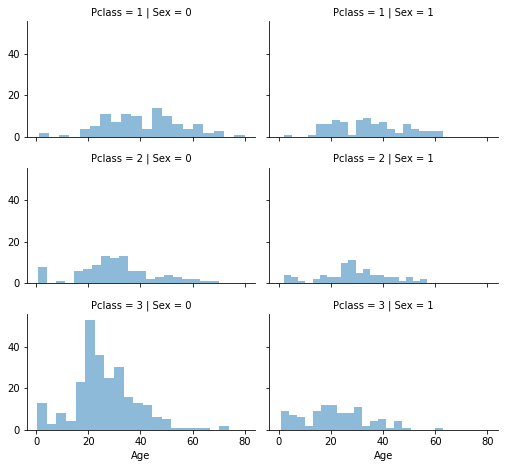

In [24]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Mari mulai mempersiapkan array kosong berisi nilai tebakan Age berdasarkan kombinasi Pclass x Gender

In [25]:
# sebuah array 2 dimensi (matriks 2 x 3)
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Lalu kita lakukan iterasi pada Sex (0 atau 1) dan Pclass (1,2,3) untuk menghitung nilai tebakan Age untuk 6 kombinasi.

In [26]:
## total ada 72 row pada guess_df dengan (50 Ada datanya 22 Nan) karena nan sudah di drop maka tersisa 50 row saja

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert float Age Acak menjadi ke 0.5 terdekat
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5

    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


***
## CATATAN
Error pada guess_df ternyata disebabkan oleh variabel Sex yang belum dikonversi menjadi numerik.

Solusi : Jalankan cell-cell satu-satu (cell yang penting), karena jika langsung dijalankan, maka pengeksekusian kode pada tiap cell akan dilakukan secara asyncronous sehingga berkemungkinan ada kode yang terlewat..
***

Selanjutnya kita akan membuat Age bands (Usia Kelompok atau dalam rentang) dan menentukan korelasinya dengan Survived

In [27]:
train_df['AgeBand'] = pd.cut(train_df['Age'],5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Mari kita menimpa Age dengan Ordinal berdasarkan Bands

In [28]:
# Mengubah umur (Continous Numerical) menjadi sebuah Categorical numeric ordinal

# usia akan dibagi menjadi beberapa rentang dan tiap rentang diwakilkan dengan sebuah angka

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [29]:
# Kalau mau, Ageband tidak perlu dihapus
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1
5,0,3,0,1,0,0,8.4583,Q,1


## MEMBUAT FEATURE BARU, GABUNGAN DARI FEATURE YANG ADA
Kita dapat membuat feature baru yaitu FamilySize yang merupakan kombinasi dari Parch dan SibSp. Setelah feature baru tersebut dibuat, kita dapat menghapus Parch dan SibSp

In [30]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Kita dapat membuat feature baru lagi yaitu IsAlone


In [31]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Mari kita drop feature Parch, SibSp, dan FamilySize untuk kepentingan IsAlone

In [32]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


Kita juga bisa membuat feature kombinasi Pclass dan Age

In [33]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


## MENYEMPURNAKAN FEATURE CATEGORICAL
Feature embarke berisi S, Q, C berdasarkan pelabuhan tempat mulai pelayaran. Dataset kita punya 2 nilai yang hilang. Kita dapat dengan mudah mengisi ini dengan nilai yang paling banyak

In [34]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## CONVERTING CATEGORICAL FEATURE MENJADI NUMERICAL
sekarang kita bisa mengkonversi nilai-nilai pada feature embarked menjadi numeric dengan rentang 0-2

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


## COMPLETING DAN CONVERTING NUMERIC FEATURE DENGAN CEPAT
Kita sekarang dapat melengkapi feature Fare untuk nilai-nilai yang hilang pada test dataset menggunakan mode untuk mendapatkan nilai yang muncul paling banyak pada feature ini.

Perhatikan bahwa kita tidak membuat feature baru atau analisis lebih lanjut terhadap correlation untuk menebak nilai yang hilang karena nilai yang hilang pada feature Fare hanya ada pada satu row. Tujuan dalam menyempurnakan data sudah dicapai, sehingga algoritma model machine learning sekarang bisa diterapkan pada data

In [37]:
# isi nilai yang kosong dengan median
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [38]:
# korelasi antara rentang fare dengan bertahan hidup
# membuat Feature baru bernama FareBand (Rentang Fare)
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [39]:
# konversi tiap rentang menjadi sebuah nilai sebagai perwakilannya
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


***
## CATATAN PENTING !!
Diusahakan kode pada cell sebelumnya jangan di Re-Run karena bisa berdampak error, karena alur pengeksekusian kode adalah berurutan berdasarkan cell yang dijalanka bukan urutan cell (top to bottom)
***

In [40]:
# cek test dataset
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## MEMBUAT MODEL, MEMPREDIKSI DAN PENYELESAIAN
Sekarang kita sudah siap melakukan train pada sebuah model dan memprediksi solusi yang dibutuhkan. Ada sekitar **60+ Algoritma Predictive Modelling** yang bisa dipilih. 

Kita harus paham jenis masalah yang akan kita evaluasi. Masalah kita adalah masalah classification dan regression.

Kita akan mengidentifikasi hubungan antara output (Survive atau tidak) dengan variabel/features lain. Kita juga melakukan pembuatan model dalam cabang supervised learning (target / label sudah diketahui).

Dengan dua kriteria ini - Supervised learning -> classification dan regression, kita dapat mempersempit pilihan kita dalam memilih algoritma untuk membuat model. Diantara banyaknya algoritma, kita hanya akan memilih algoritma classification dan regression saja, yaitu sebagai berikut :
- Logistic Regression
- KNN atau k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes Classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial Neural Network
- RVM atau Relevance Vector Machine

## MEMBUAT MODEL MACHINE LEARNING

In [41]:
# X adalah dataset berisi feature
# Y adalah series berisi target
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression adalah model yang berguna untuk dijalankan pada awal workflow. Logistic Regression mengukur hubungan antara Categorical Dependent Variable (Feature) dan satu atau lebih Independent Variable (features) dengan memperkirakan probabilitas menggunakan fungsi logistic.

Ingat bahwa skor confidence (seberapa terpercaya algorithm dalam memprediksi) yang dihasilkan oleh algoritma adalah berdasarkan dataset yang kita miliki

In [42]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

kita dapat menggunakan Logistic Regression untuk memvalidasi asumsi dan keputusan saat kita membuat dan menyempurnakan data. ini dapat dilakukan dengan menghitung koefisien Features dalam decision function.

Koefisien positif meningkatkan log-odds dari response (Meningkatkan probabilitas), dan koefisien negatif mengurangi log-odds dari response (mengurangi probabilitas)
- Sex adalah positive coefficient tertinggi, menyiratkan seolah-olah nilai Sex meningkat (male:0, female:1), probabilitas Survived=1 paling banyak meningkat
- Kebalikannya saat Pclass meningkat, probabilitas survived=1 menurun paling banyak.
- Age*Class adalah Feature buatan yang bagus pada model karena ia memiliki negative correlation tertinggi kedua terhadap survived
- Begitu juga title yang merupakan pemilik positive correlation tertinggi kedua

In [43]:
# pembuktian cell diatas
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


In [44]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

In [45]:
# k-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In [46]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

In [47]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [48]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.12

In [49]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.68

In [50]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [51]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

## EVALUASI MODEL
Sekarang kita dapat melakukan pemeringkatan berdasarkan confidence score algoritma-algoritma diatas.

In [53]:
# mari lihat tiap skor
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.12
6,Stochastic Gradient Decent,78.68
5,Perceptron,78.34
0,Support Vector Machines,78.23
4,Naive Bayes,72.28


In [59]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [60]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
# finally inilah submission untuk disubmit di kaggle
submission.to_csv('D:\Data-science-competition/submission.csv', index=False)